# Don't Overfit! II

## Problem Statements

<p style="text-indent: 40px"> One of the main objectives of predictive modelling is to build a model that will give accurate predictions on unseen data which will only be possible when we make sure that they have not overfitted the training data. Before going to understand how to ensure that our model hasn’t overfitted training data, let’s first get aware of the reasons which lead the model to get overfitted.</p> </br>
<p style="text-indent: 40px"> There are many reasons for the same, yet we would like to point out some major reasons. First, being of fewer data points in training samples, second is the dataset being imbalanced, and last but not the least, complex nature of model.</p></br>
<p style="text-indent: 40px"> In this case study, we are going to handle the same problem of overfitting and the challenging part is to make a model with 250 data points in the train set and predict the binary target accurately for 19750 unseen data points in the test set. The dataset has 300 features of a continuous variable. </br>
<li>The dataset is obtained from the link: https://www.kaggle.com/c/dont-overfit-ii/data</li>









## Source/Useful Links



*   https://towardsdatascience.com/underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6fe4a8a49dbf
*   https://iopscience.iop.org/article/10.1088/1742-6596/1168/2/022022/pdf
*   http://www.jmlr.org/papers/volume3/reunanen03a/reunanen03a.pdf
*   https://static.aminer.org/pdf/PDF/000/265/793/a_noise_metric_on_binary_training_inputs_and_a_framework.pdf
*   https://towardsdatascience.com/noise-its-not-always-annoying-1bd5f0f240f
*   https://medium.com/analytics-vidhya/just-dont-overfit-e2fddd28eb29
*   https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323









## Data

### Files


*   train.csv - the training set. 250 rows.
*   test.csv - the test set. 19,750 rows.
*   sample_submission.csv - a sample submission file in the correct format

### Columns



*   id- sample id
*   target- a binary target of mysterious origin.
*   0-299- continuous variables.

## Performance Metric



*   AUROC



# Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/My Drive/Self Case Study-1'
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Self Case Study-1
BestModel.sav	 EDA_and_FE.ipynb   result
Blog.gdoc	 Final.ipynb	    SavedModel
data		 ML_Models.ipynb    talk2mubasir0587@gmail.com_CS1.docx
DL_Models.ipynb  preprocessing.sav  talk2mubasir0587@gmail.com_CS1.pdf


# Import Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Import Dataset

In [4]:
data = pd.read_csv('data/train.csv')
data.head()

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,-0.912,-0.107,0.305,0.102,0.826,0.417,0.177,-0.673,-0.503,1.864,0.410,-1.927,0.102,-0.931,1.763,1.449,-1.097,-0.686,-0.250,-1.859,1.125,1.009,-2.296,0.385,-0.876,1.528,-0.144,-1.078,...,-0.681,1.250,-0.565,-1.318,-0.923,0.075,-0.704,2.457,0.771,-0.460,0.569,-1.320,-1.516,-2.145,-1.120,0.156,0.820,-1.049,-1.125,0.484,0.617,1.253,1.248,0.504,-0.802,-0.896,-1.793,-0.284,-0.601,0.569,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,2.907,1.085,2.144,1.540,0.584,1.133,1.098,-0.237,-0.498,0.283,-1.100,-0.417,1.382,-0.515,-1.519,0.619,-0.128,0.866,-0.540,1.238,-0.227,0.269,-0.390,-2.721,1.659,0.106,-0.121,1.719,...,0.971,-1.489,0.530,0.917,-0.094,-1.407,0.887,-0.104,-0.583,1.267,-1.667,-2.771,-0.516,1.312,0.491,0.932,2.064,0.422,1.215,2.012,0.043,-0.307,-0.059,1.121,1.333,0.211,1.753,0.053,1.274,-0.612,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,0.137,0.183,0.459,0.478,-0.425,0.352,1.095,0.300,-1.044,0.270,-1.038,0.144,-1.658,-0.946,0.633,-0.772,1.786,0.136,-0.103,-1.223,2.273,0.055,-2.032,-0.452,0.064,0.924,-0.692,-0.067,-0.917,1.896,...,-0.540,-0.299,1.074,-0.748,1.086,-0.766,-0.931,0.432,1.345,-0.491,-1.602,-0.727,0.346,0.780,-0.527,-1.122,-0.208,-0.730,-0.302,2.535,-1.045,0.037,0.020,1.373,0.456,-0.277,1.381,1.843,0.749,0.202,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,0.503,0.274,0.335,-1.148,0.067,-1.010,1.048,-1.442,0.210,0.836,-0.326,0.716,-0.764,0.248,-1.308,2.127,0.365,0.296,-0.808,1.854,0.118,0.380,0.999,-1.171,2.798,0.394,-1.048,1.078,0.401,-0.486,...,-0.083,-0.831,1.251,-0.206,-0.933,-1.215,0.281,0.512,-0.424,0.769,0.223,-0.710,2.725,0.176,0.845,-1.226,1.527,-1.701,0.597,0.150,1.864,0.322,-0.214,1.282,0.408,-0.910,1.020,-0.299,-1.574,-1.618,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,-0.012,2.198,0.190,0.453,0.494,1.478,-1.412,0.270,-1.312,-0.322,-0.688,-0.198,-0.285,1.042,-0.315,-0.478,0.024,-0.190,1.656,-0.469,-1.437,-0.581,-0.308,-0.837,-1.739,0.037,0.336,-1.102,2.371,0.554,...,-1.050,-0.347,0.904,-1.324,-0.849,3.432,0.222,0.416,0.174,-1.517,-0.337,0.055,-0.464,0.014,-1.073,0.325,-0.523,-0.692,0.190,-0.883,-1.830,1.408,2.319,1.704,-0.723,1.014,0.064,0.096,-0.775,1.845,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [5]:
data.shape

(250, 302)

## Describtion of train Dataset

In [6]:
data.describe()

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.640000,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,-0.036920,0.035448,-0.005032,0.110248,0.019808,-0.001108,-0.016280,-0.039644,0.017260,-0.106856,0.036184,-0.043296,-0.110832,0.072680,0.017296,-0.030728,-0.128252,0.154736,0.083408,0.039552,-0.091784,0.054636,-0.048288,-0.017296,0.007708,-0.134460,0.093852,-0.020588,-0.002492,-0.141400,...,0.005780,-0.102304,-0.013796,0.089384,0.036368,0.016276,-0.069448,-0.113236,0.035696,0.034484,-0.066236,-0.057988,0.091556,-0.029896,0.115648,0.007372,0.033552,0.090524,0.001576,-0.007784,0.043184,0.082696,0.098476,0.055356,0.111708,-0.015688,0.035992,0.026452,-0.059152,0.077272,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,72.312977,0.480963,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,0.963688,1.019689,1.085089,1.036265,1.050041,1.024305,0.926789,0.955915,1.025655,1.012777,0.945099,1.055935,1.003178,1.039556,0.988482,0.945902,0.997026,0.997894,1.040371,0.922270,1.047282,1.041432,1.010971,0.992464,0.986350,1.015563,1.117898,0.958191,0.948855,1.042429,...,0.994761,1.094494,1.026025,0.963489,1.026373,1.008207,0.989451,1.002857,0.944743,1.023709,0.985451,0.951879,1.027877,0.966882,1.037173,1.004543,1.006219,1.037119,1.024067,1.056086,1.012516,1.068741,0.934163,0.988100,1.043230,1.010720,1.058982,0.896318,1.113760,0.972530,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,0.000000,0.000000,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,-2.768000,-2.361000,-3.302000,-2.851000,-2.681000,-2.596000,-3.275000,-3.512000,-2.476000,-3.619000,-2.428000,-3.229000,-3.024000,-2.775000,-2.962000,-2.490000,-3.107000,-2.943000,-2.933000,-2.942000,-2.957000,-2.911000,-2.568000,-2.649000,-3.031000,-2.913000,-3.265000,-2.372000,-3.037000,-3.340000,...,-2.512000,-2.873000,-2.549000,-2.721000,-2.578000,-2.239000,-3.046000,-2.755000,-2.507000,-3.369000,-2.448000,-2.771000,-2.903000,-2.522000,-2.759000,-2.915000,-2.618000,-3.623000,-2.673000,-3.229000,-2.537000,-2.748000,-2.850000,-2.577000,-2.973000,-2.709000,-3.605000,-2.357000,-2.904000,-2.734000,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,62.250000,0.000000,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,-0.689500,-0.643500,-0.693500,-0.524000,-0.708500,-0.692000,-0.677000,-0.634500,-0.683500,-0.801500,-0.574250,-0.758000,-0.870500,-0.596000,-0.725750,-0.652000,-0.779500,-0.424250,-0.585750,-0.625000,-0.751250,-0.582500,-0.713500,-0.750000,-0.588000,-0.829000,-0.648500,-0.659750,-0.614000,-0.816750,...,-0.622750,-1.009250,-0.693250,-0.567750,-0.696500,-0.684000,-0.703750,-0.771250,-0.624500,-0.653000,-0.786750,-0.701000,-0.54

## Null Values present?

There is no Null value present


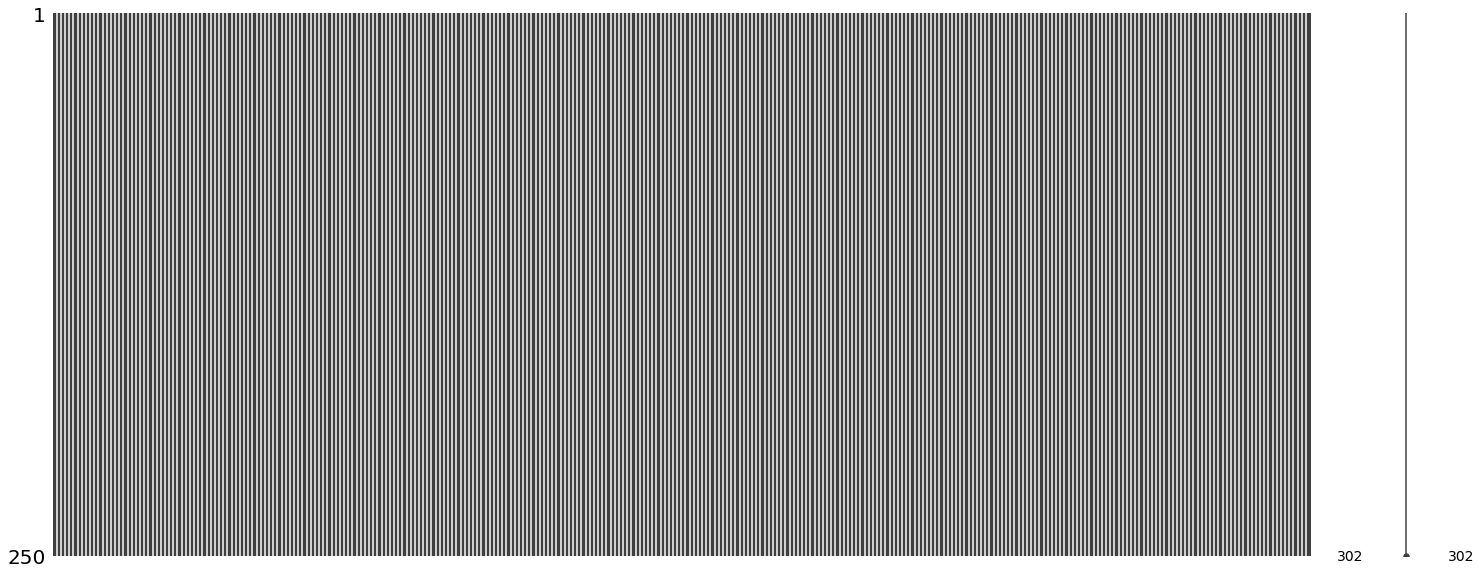

In [ ]:
nul = 0
for col in data.columns:
    if(data[col].isnull().any()):
        print(col,'has null values')
        nul = 1
if(nul==0):
    print('There is no Null value present')

msno.matrix(data) #missing value graph

There is no null value present and all values are real

# Exploratory Data Analysis(EDA)

## Univariate Analysis

### Target

Text(0.5, 1.0, 'Pic chart of Target Distribution')

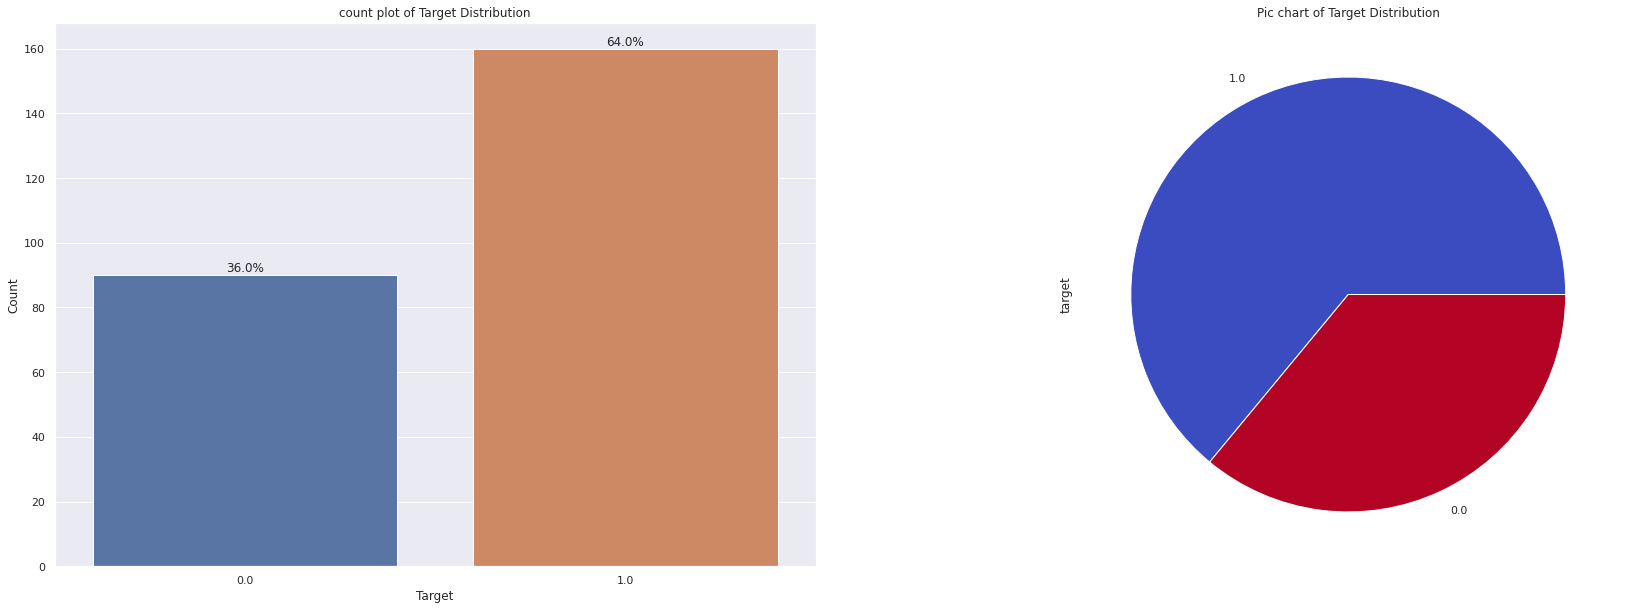

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
plt.subplot(1,2,1)
ax = sns.countplot(data['target'])
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/len(data)), (p.get_x()+0.35, p.get_height()+1))
ax.set_title('count plot of Target Distribution')
ax.set_xlabel('Target')
ax.set_ylabel('Count')

plt.subplot(1,2,2)
ax = data['target'].value_counts().plot(kind='pie', colormap='coolwarm')
ax.set_title('Pic chart of Target Distribution')

* It is clearly visible that dataset is imbalanced where data points belonging to target 0 is 36%% but target 1 to 64%%. target 1 is roughly 2 times target 0

### Distribution plot of all 300 features in single frame

In [ ]:
# https://stackoverflow.com/questions/50940283/show-metrics-like-kurtosis-skewness-on-distribution-plot-using-seaborn-in-pytho
sns.set(rc={'figure.figsize':(30,90)})
fig, ax = plt.subplots(30, 10,sharex='col', sharey='row')
ax = ax.reshape(-1)
for i, col in enumerate(data.columns[2:]):
    g0 = data[data['target']==0.0][col]
    g1 = data[data['target']==1.0][col]
    sns.distplot(g0, label = 'target 0', ax=ax[i], color='b')
    sns.distplot(g1, label = 'target 1', ax=ax[i], color='r')

min_skew, max_skew = 100, -100
min_kurt, max_kurt = 100, -100

for i, x in enumerate(ax):
    skew = data.iloc[:,i+2].skew()
    min_skew = min(min_skew, skew)
    max_skew = max(max_skew, skew)
    x.text(x=0.97, y=0.97, transform=x.transAxes, s="Skewness: %f" % skew,\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    kurt = data.iloc[:,i+2].kurt()
    min_kurt = min(min_kurt, kurt)
    max_kurt = max(max_kurt, kurt)
    x.text(x=0.97, y=0.87, transform=x.transAxes, s="Kurtosis: %f" % kurt,\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()
plt.show()

print('Skewness Range:[{},{}] '.format(min_skew,max_skew))
print('Kurtosis Range:[{},{}] '.format(min_kurt,max_kurt))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print('Skewness Range:[{},{}] '.format(min_skew,max_skew))
print('Kurtosis Range:[{},{}] '.format(min_kurt,max_kurt))

Skewness Range:[-0.3764877692778849,0.43329543112647406] 
Kurtosis Range:[-0.7820878047375319,0.9842412290423783] 


### Box Plot of all 300 features in single frame

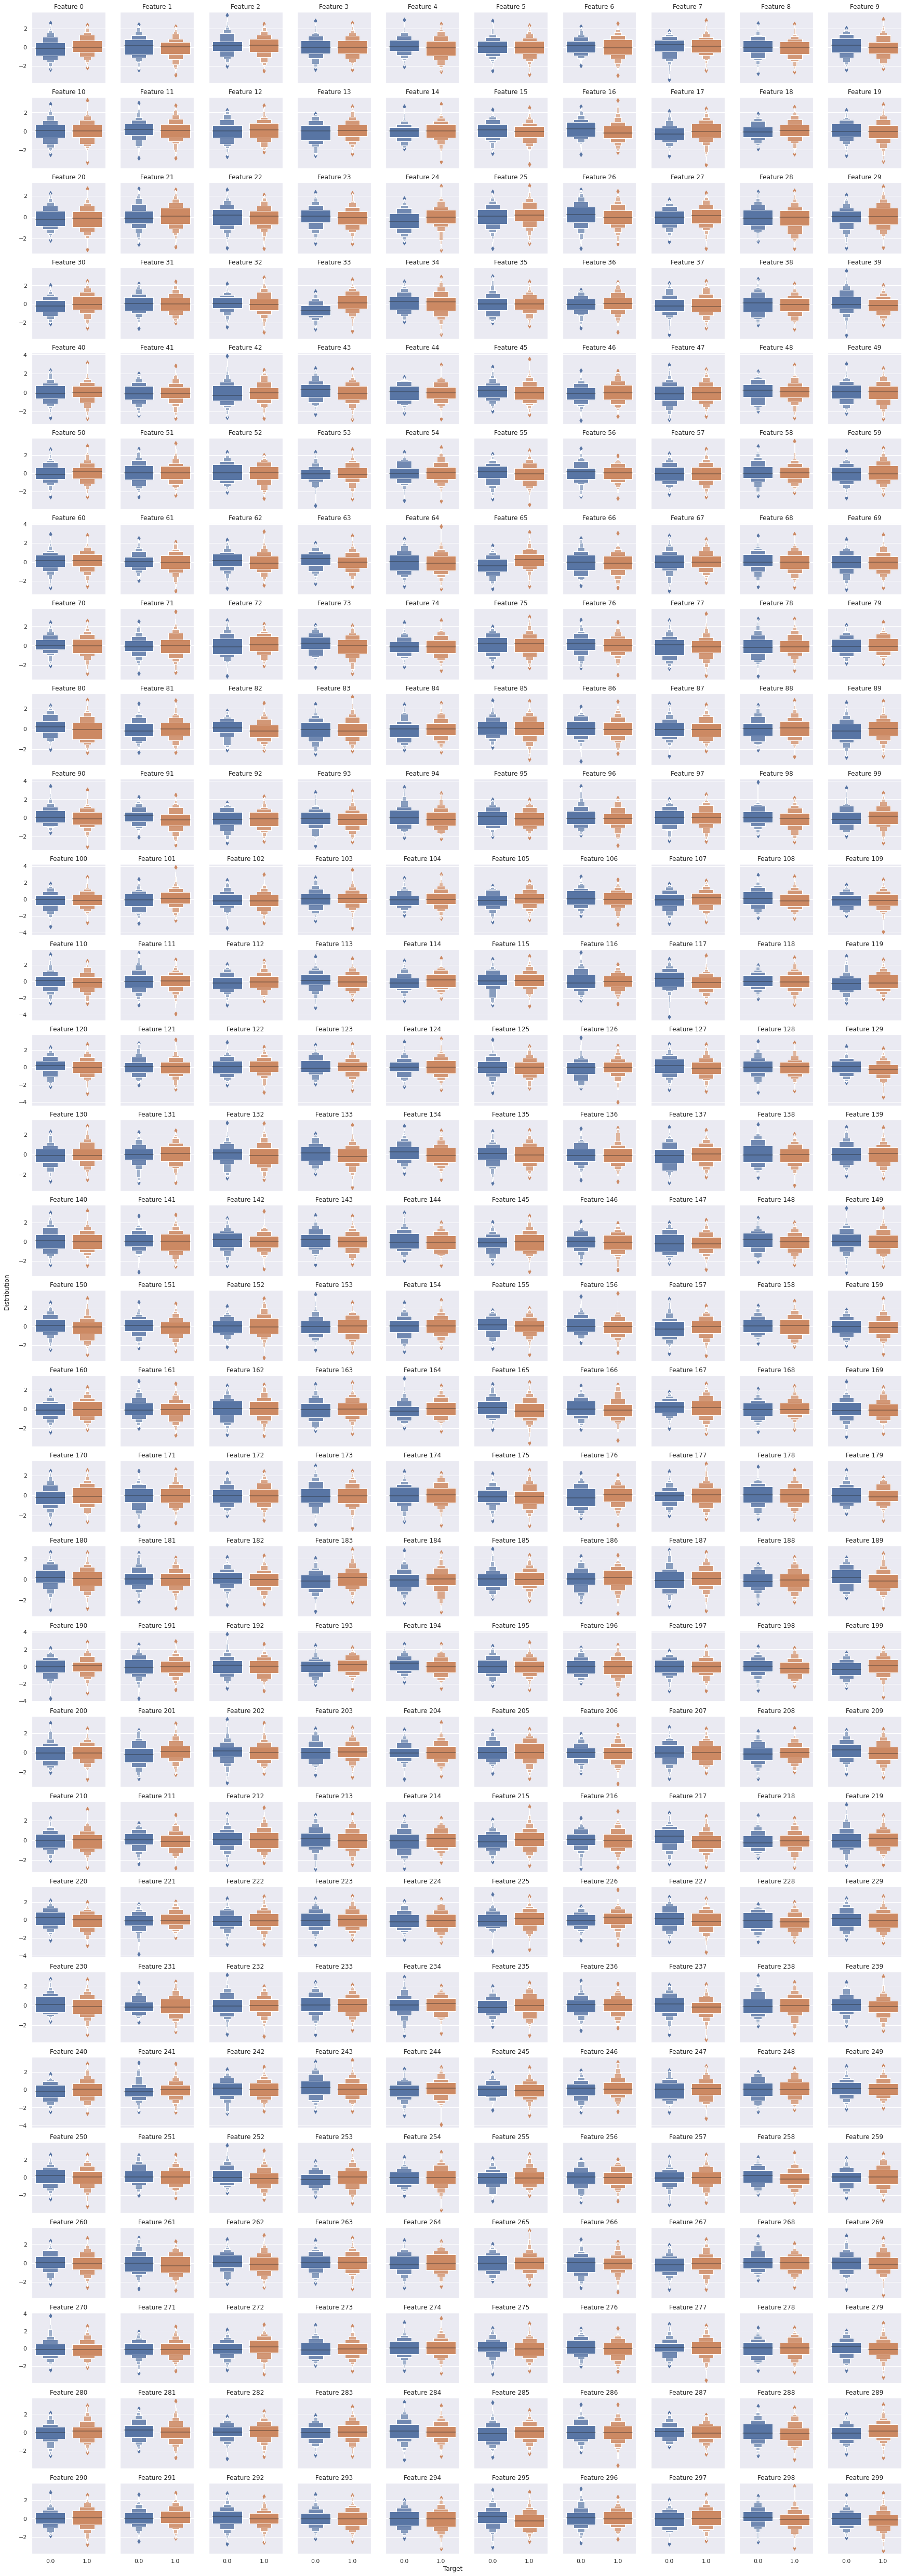

In [ ]:
sns.set(rc={'figure.figsize':(30,90)})
fig, ax = plt.subplots(30, 10,sharex='col', sharey='row')
fig.text(0.5, 0.12, s='Target', ha='center',)
fig.text(0.1, 0.5, s='Distribution', va='center', rotation='vertical')
ax = ax.reshape(-1)
for i, col in enumerate(data.columns[2:]):
    axe= sns.boxenplot(np.array(data['target']),np.array(data[col]), ax=ax[i])
    ax[i].set_title('Feature '+col)
plt.show()

* From above two plots it is clearly perceived that the distribution of all the 300 features are almost identicle, all have almost same means and standard deviations. 
* If you look into the each graph of feature, you would found that even in signle feature distribution of target 0 and target 1 points are overlaped. skew values of all the features distribution are in range of [-0.37 , 0.43] and kurtosis values are in range [-0.78, 0.98] thus we can say all distributions are approximately symmetric but not perfecltly noraml distributed

## Bivariate Analysis

### Correlation

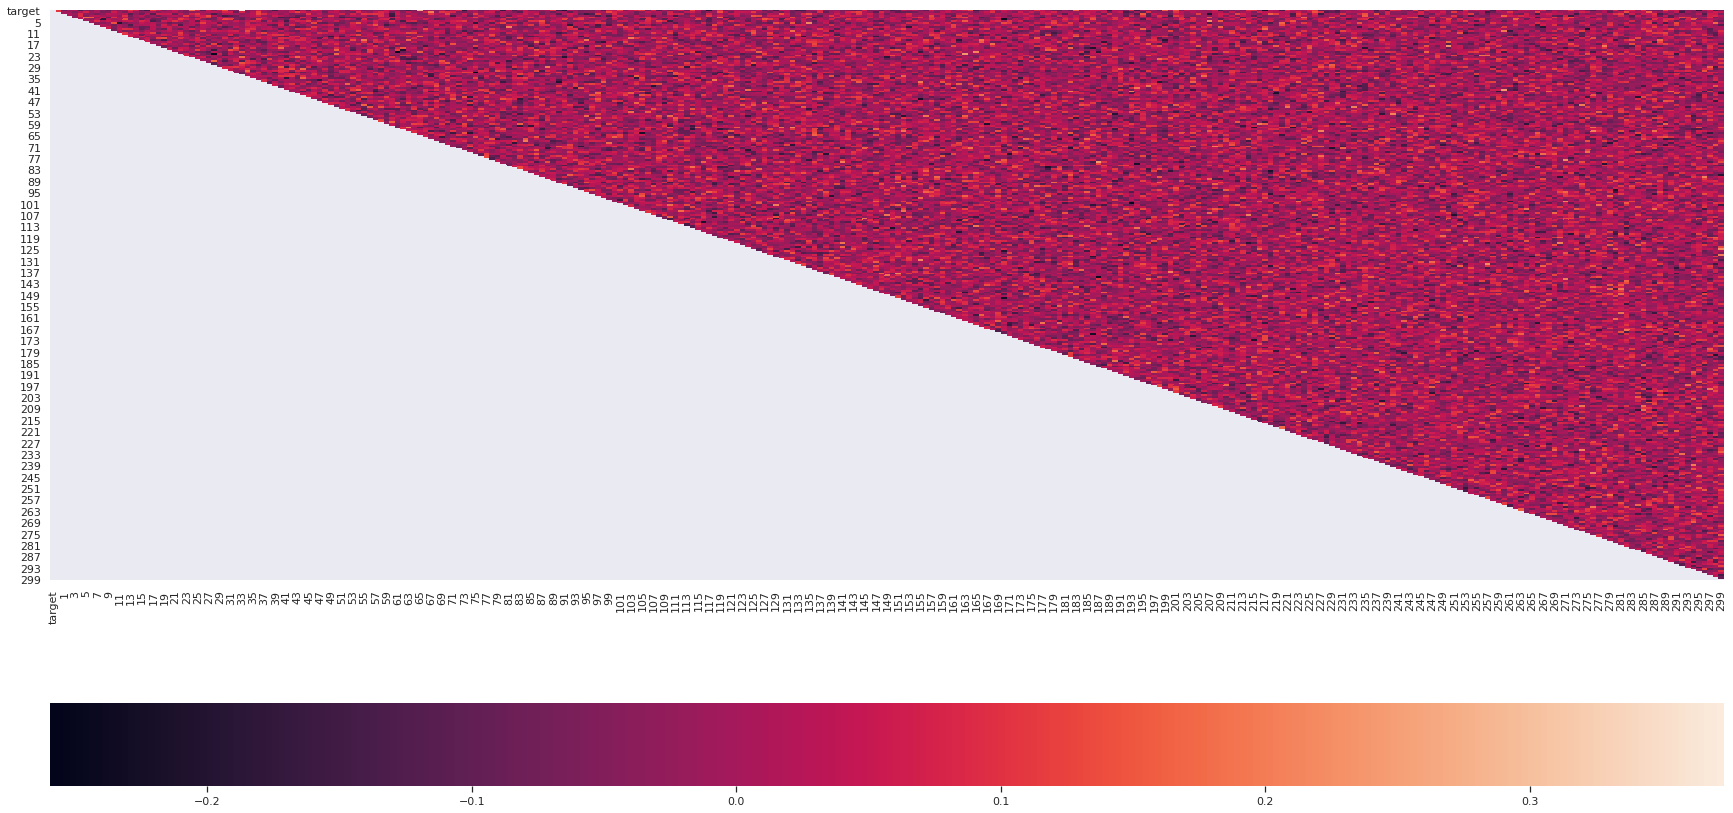

In [ ]:
sns.set(rc={'figure.figsize':(30,15)})
matrix = np.tril(data.drop(['id'], axis=1).corr())
ax = sns.heatmap(data.drop(['id'], axis=1).corr(), cbar_kws= {'orientation': 'horizontal'}, mask=matrix)

* From the above heatmap it is really difficult to get exact value of correlation between the features but from colorbar it can say that features are not highly correlated as the range fo correlation is in range of [-0.2 to 0.2]

### Top 10 Correlated features with target

In [ ]:
correlations = data.drop(['id'], axis=1).corr().unstack().drop_duplicates()
print('Top 10 positive correlated features with target:')
print(correlations["target"].sort_values(ascending=False)[:10])
print('-'*100)
print('Top 10 negative correlated features with target:',)
print(correlations["target"].sort_values(ascending=True)[:10])

Top 10 positive correlated features with target:
target    1.000000
33        0.373608
65        0.293846
24        0.173096
183       0.164146
199       0.159442
201       0.142238
30        0.132705
289       0.127213
114       0.124792
dtype: float64
----------------------------------------------------------------------------------------------------
Top 10 negative correlated features with target:
217   -0.207215
117   -0.197496
91    -0.192536
295   -0.170501
73    -0.167557
80    -0.162558
189   -0.155956
194   -0.150384
16    -0.144267
39    -0.142915
dtype: float64


Text(0, 0.5, 'Correlation values')

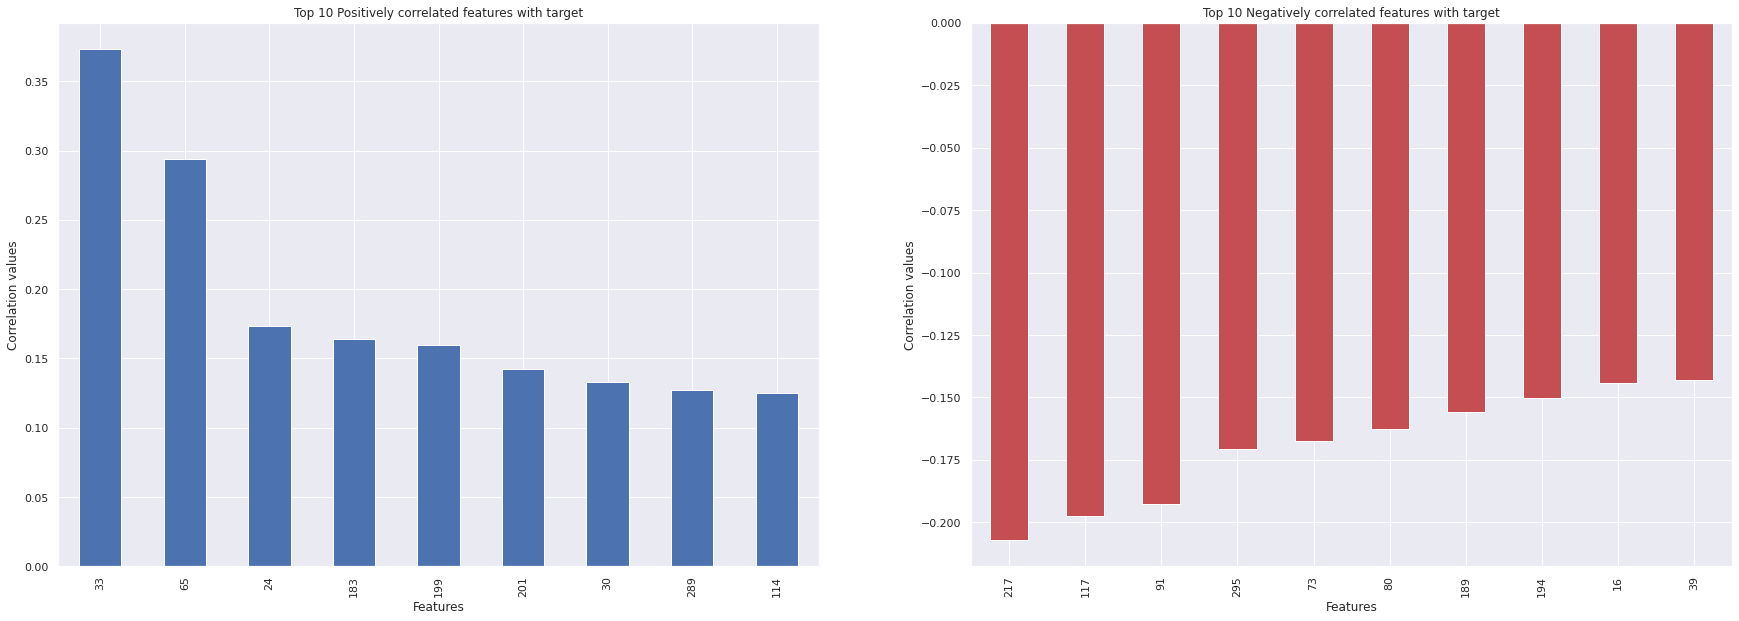

In [ ]:
correlations = data.drop(['id'], axis=1).corr().unstack().drop_duplicates()
sns.set(rc={'figure.figsize':(30,10)})
plt.subplot(1,2,1)
x = correlations["target"].sort_values(ascending=False)[1:10].plot(kind='bar', title='Top 10 Positively correlated features with target')
x.set_xlabel('Features')
x.set_ylabel('Correlation values')

plt.subplot(1,2,2)
x = correlations["target"].sort_values(ascending=True)[:10].plot(kind='bar', title='Top 10 Negatively correlated features with target', color='r')
x.set_xlabel('Features')
x.set_ylabel('Correlation values')

* Feature 33 and 217 are most correlated with the target

### Pair Plot of top 5 positively correlated features with target

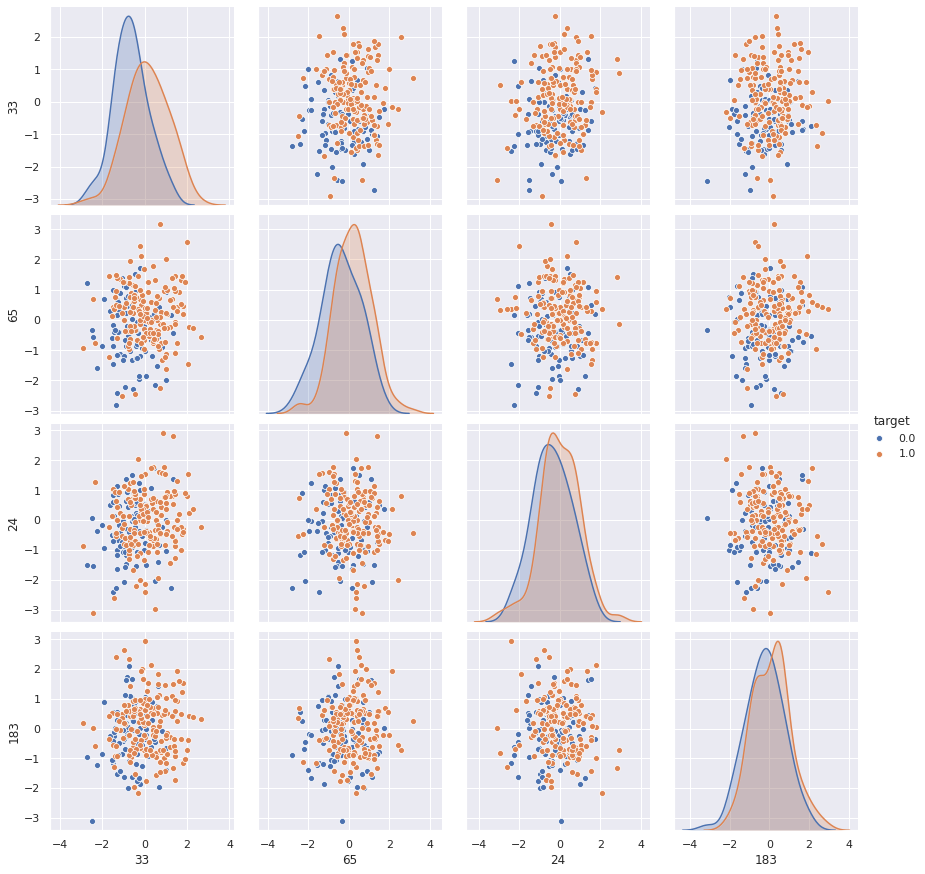

In [ ]:
features = list(correlations["target"].sort_values(ascending=False)[:5].index)
ax = sns.pairplot(data[features], hue='target', height=3)

* Above 4 features [33, 65, 24, 183] are going to be the most important towards the classification task, As it is seen clearly that they are not fully overlaped but quite seperated

Pair Plot of top 5 netatively correlated features with target

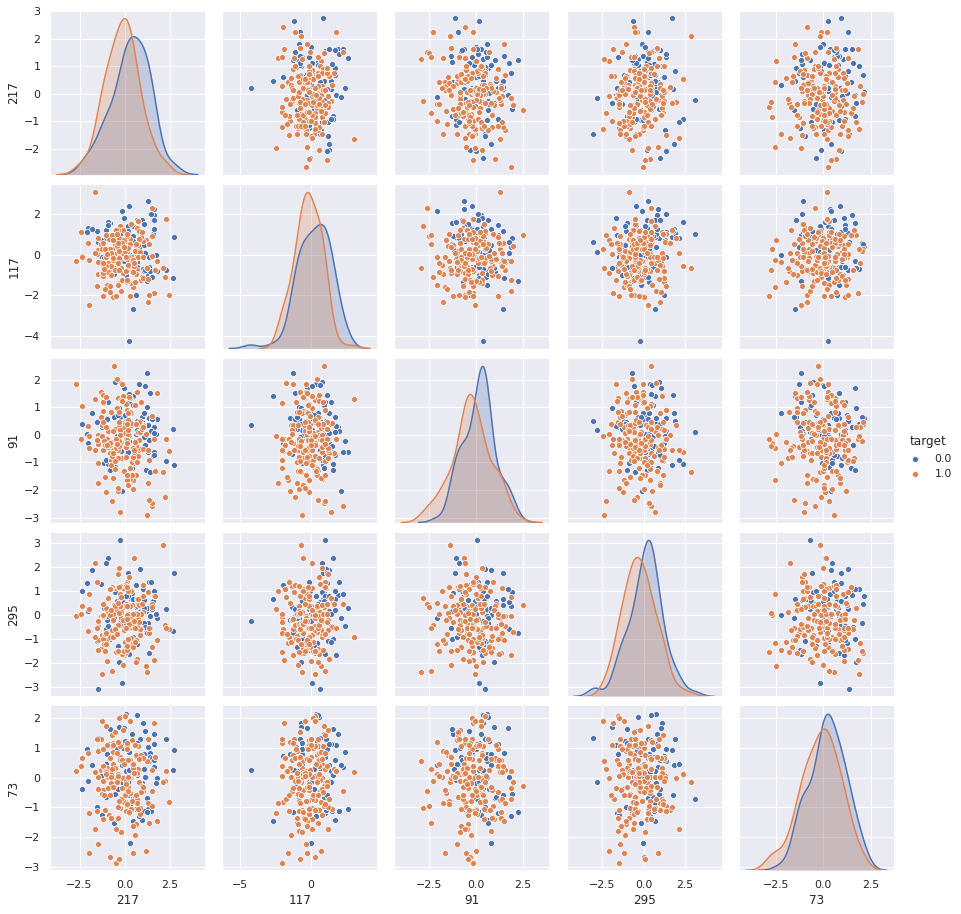

In [ ]:
features = list(correlations["target"].sort_values(ascending=True)[:5].index)
ax = sns.pairplot(data[features+['target']], hue='target', height=2.5)

* Here also features [217, 117, 91, 295, 73] would be the important features to make classification, as it is seen clearly that they are not fully overlaped but quite seperated

## Multivariate Analysis

### 2D visualization of 300D data point

Text(0, 0.5, 'pca-two')

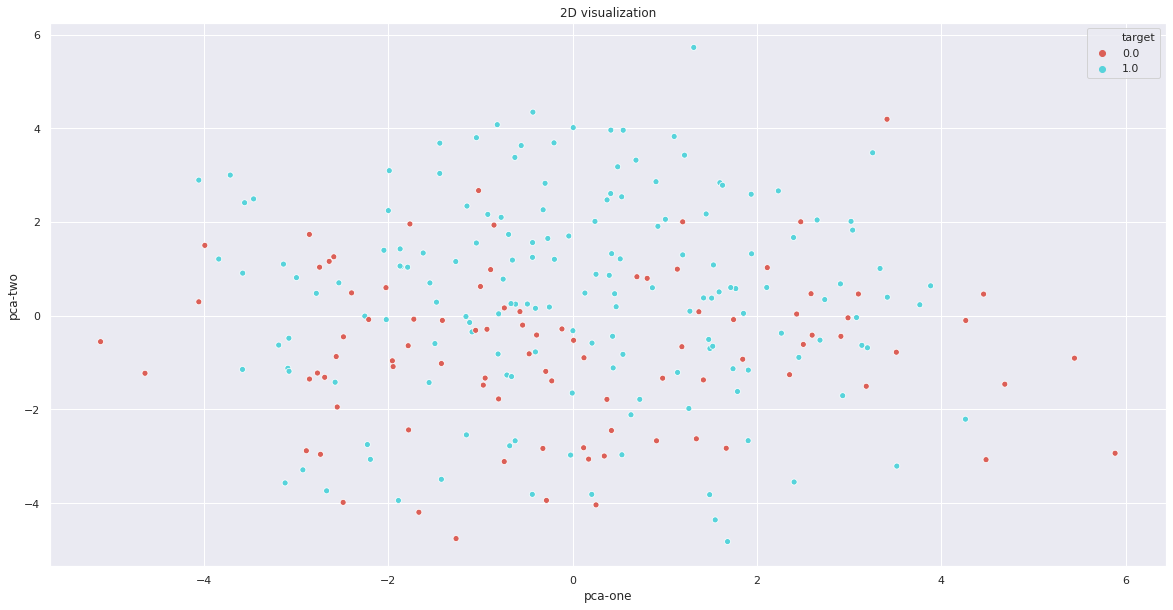

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
pca = PCA(n_components=3, svd_solver='full')
pca_result = pca.fit_transform(data.drop(['id','target'], axis=1).values)
x = pca_result[:,0]
y = pca_result[:,1]
ax = sns.scatterplot(x, y, hue = data['target'], palette=sns.color_palette("hls", 2), legend="full", alpha=1)
ax.set_title('2D visualization')
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')

* All the point are scattered in haphazard fashion thus it is not linearly seprable

### 3D visualization of 300D data point

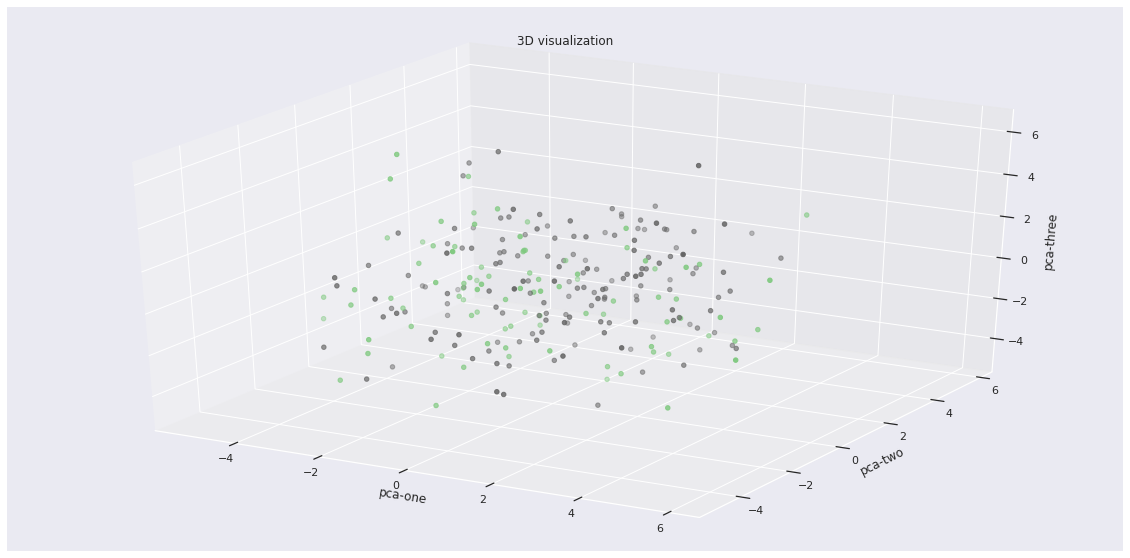

In [ ]:
ax = plt.figure(figsize=(20,10)).gca(projection='3d')
z = pca_result[:,2]
ax.scatter(xs=x, ys=y, zs=z, c=data['target'], cmap='Accent')
ax.set_title('3D visualization')
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

* target 0 and rarget 1 points are getting more separated as the dimension increased thus in high dimension, it will be more distinguishable

### Mean, Standard deviation, Skewness and Kurtosis for all the features

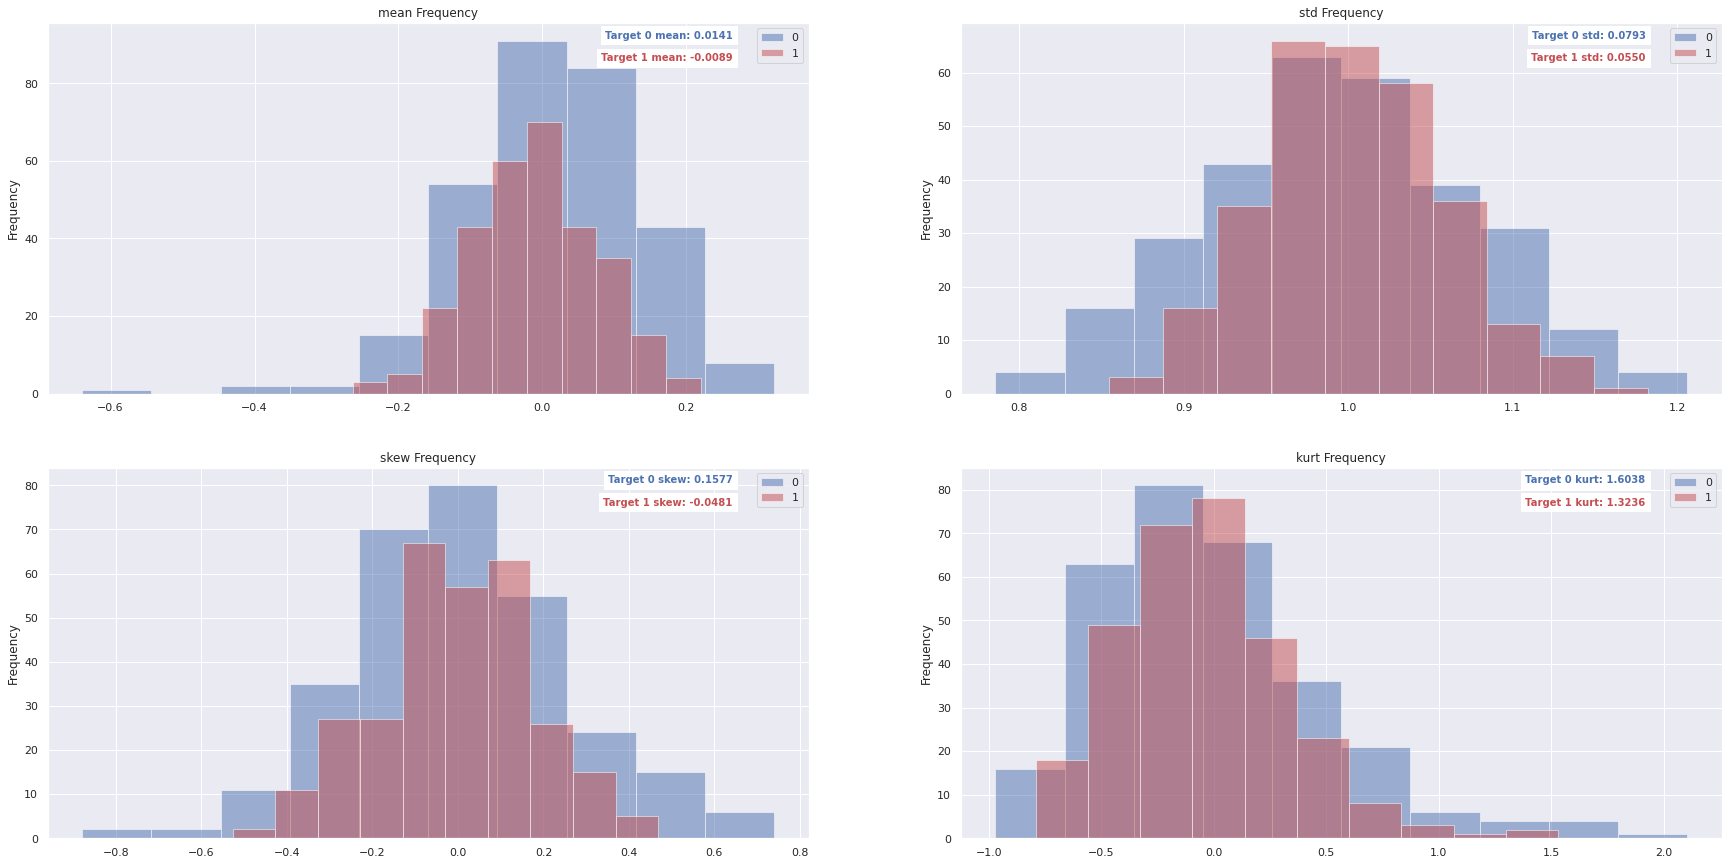

In [ ]:
sns.set(rc={'figure.figsize':(30,15)})
g0 = data[data['target']==0.0][data.columns[2:]]
g1 = data[data['target']==1.0][data.columns[2:]]


for i, fun in enumerate(['mean','std','skew','kurt']):
    plt.subplot(2,2,i+1)
    if(fun=='mean'):
        f0, f1, p0, p1 = g0.mean().mean(), g1.mean().mean(), g0.mean(), g1.mean()
    elif(fun=='std'):
        f0, f1, p0, p1 = g0.std().std(), g1.std().std(), g0.std(), g1.std()
    elif(fun=='skew'):
        f0, f1, p0, p1 = g0.skew().skew(), g1.skew().skew(), g0.skew(), g1.skew()
    elif(fun=='kurt'):
        f0, f1, p0, p1 = g0.kurt().kurt(), g1.kurt().kurt(), g0.kurt(), g1.kurt()

    x = p0.plot(kind = 'hist', alpha=0.5, label='0', color='b')
    x.text(x=0.90, y=0.98, transform=x.transAxes, s="Target 0 {}: {:.4f}".format(fun,f0),\
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='b')
    x = p1.plot(kind = 'hist', alpha=0.5, label='1', color='r')
    x.text(x=0.90, y=0.92, transform=x.transAxes, s="Target 1 {}: {:.4f}".format(fun,f1),\
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='r')
    plt.title(fun+' Frequency')
    plt.legend()
plt.show()

* All the features, based on mean and standard deviation fequency graph seem to be normalized and normally distrubuted with mean = 0 (approx) and std=0.1 (approx). 
* If we looked at skew and kurtosis frequency graph, skewnness = 0.15 and kurtosis > 1.5 (for target 1 data points) which shows that it has heavier tail than a normal distribution.
* Distribution of target 0 and target 1 data point are overlapped.
* Thus we can conclude tha it is not randomly distributed.

# Feature Engineering(FE) 

In [ ]:
test = pd.read_csv('data/test.csv')
test.shape

(19750, 301)

## Binning of Features which skewness>0.4 OR skewness<-0.4

In [ ]:
bf = list()
for i in data.columns[2:]:
    skew = data[i].skew()
    if(skew>0.3 or skew<-0.3):
        bf.append((i,skew))
print('Number of Features for binning: ', len(bf))
print('Features for with their skewness: ', bf)
bf = dict(bf)

Number of Features for binning:  7
Features for with their skewness:  [('7', -0.35104580286392834), ('16', 0.31054872486944385), ('94', 0.40844635283690084), ('164', 0.36331007416454003), ('186', -0.3764877692778849), ('270', 0.43329543112647406), ('282', -0.3312908075992737)]


### Quartile based adaptive binning of features 94, and 270

In [ ]:
# https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b
for col in bf.keys():
    quantile_list = [0, .25, .5, .75, 1.]
    quantiles = data[col].quantile(quantile_list)
    quantile_labels = [0, 1, 2, 3]
    data['Quantile_binning_'+col] = pd.qcut(data[col], q=quantile_list, labels=quantile_labels)
    test['Quantile_binning_'+col] = pd.qcut(test[col], q=quantile_list, labels=quantile_labels)

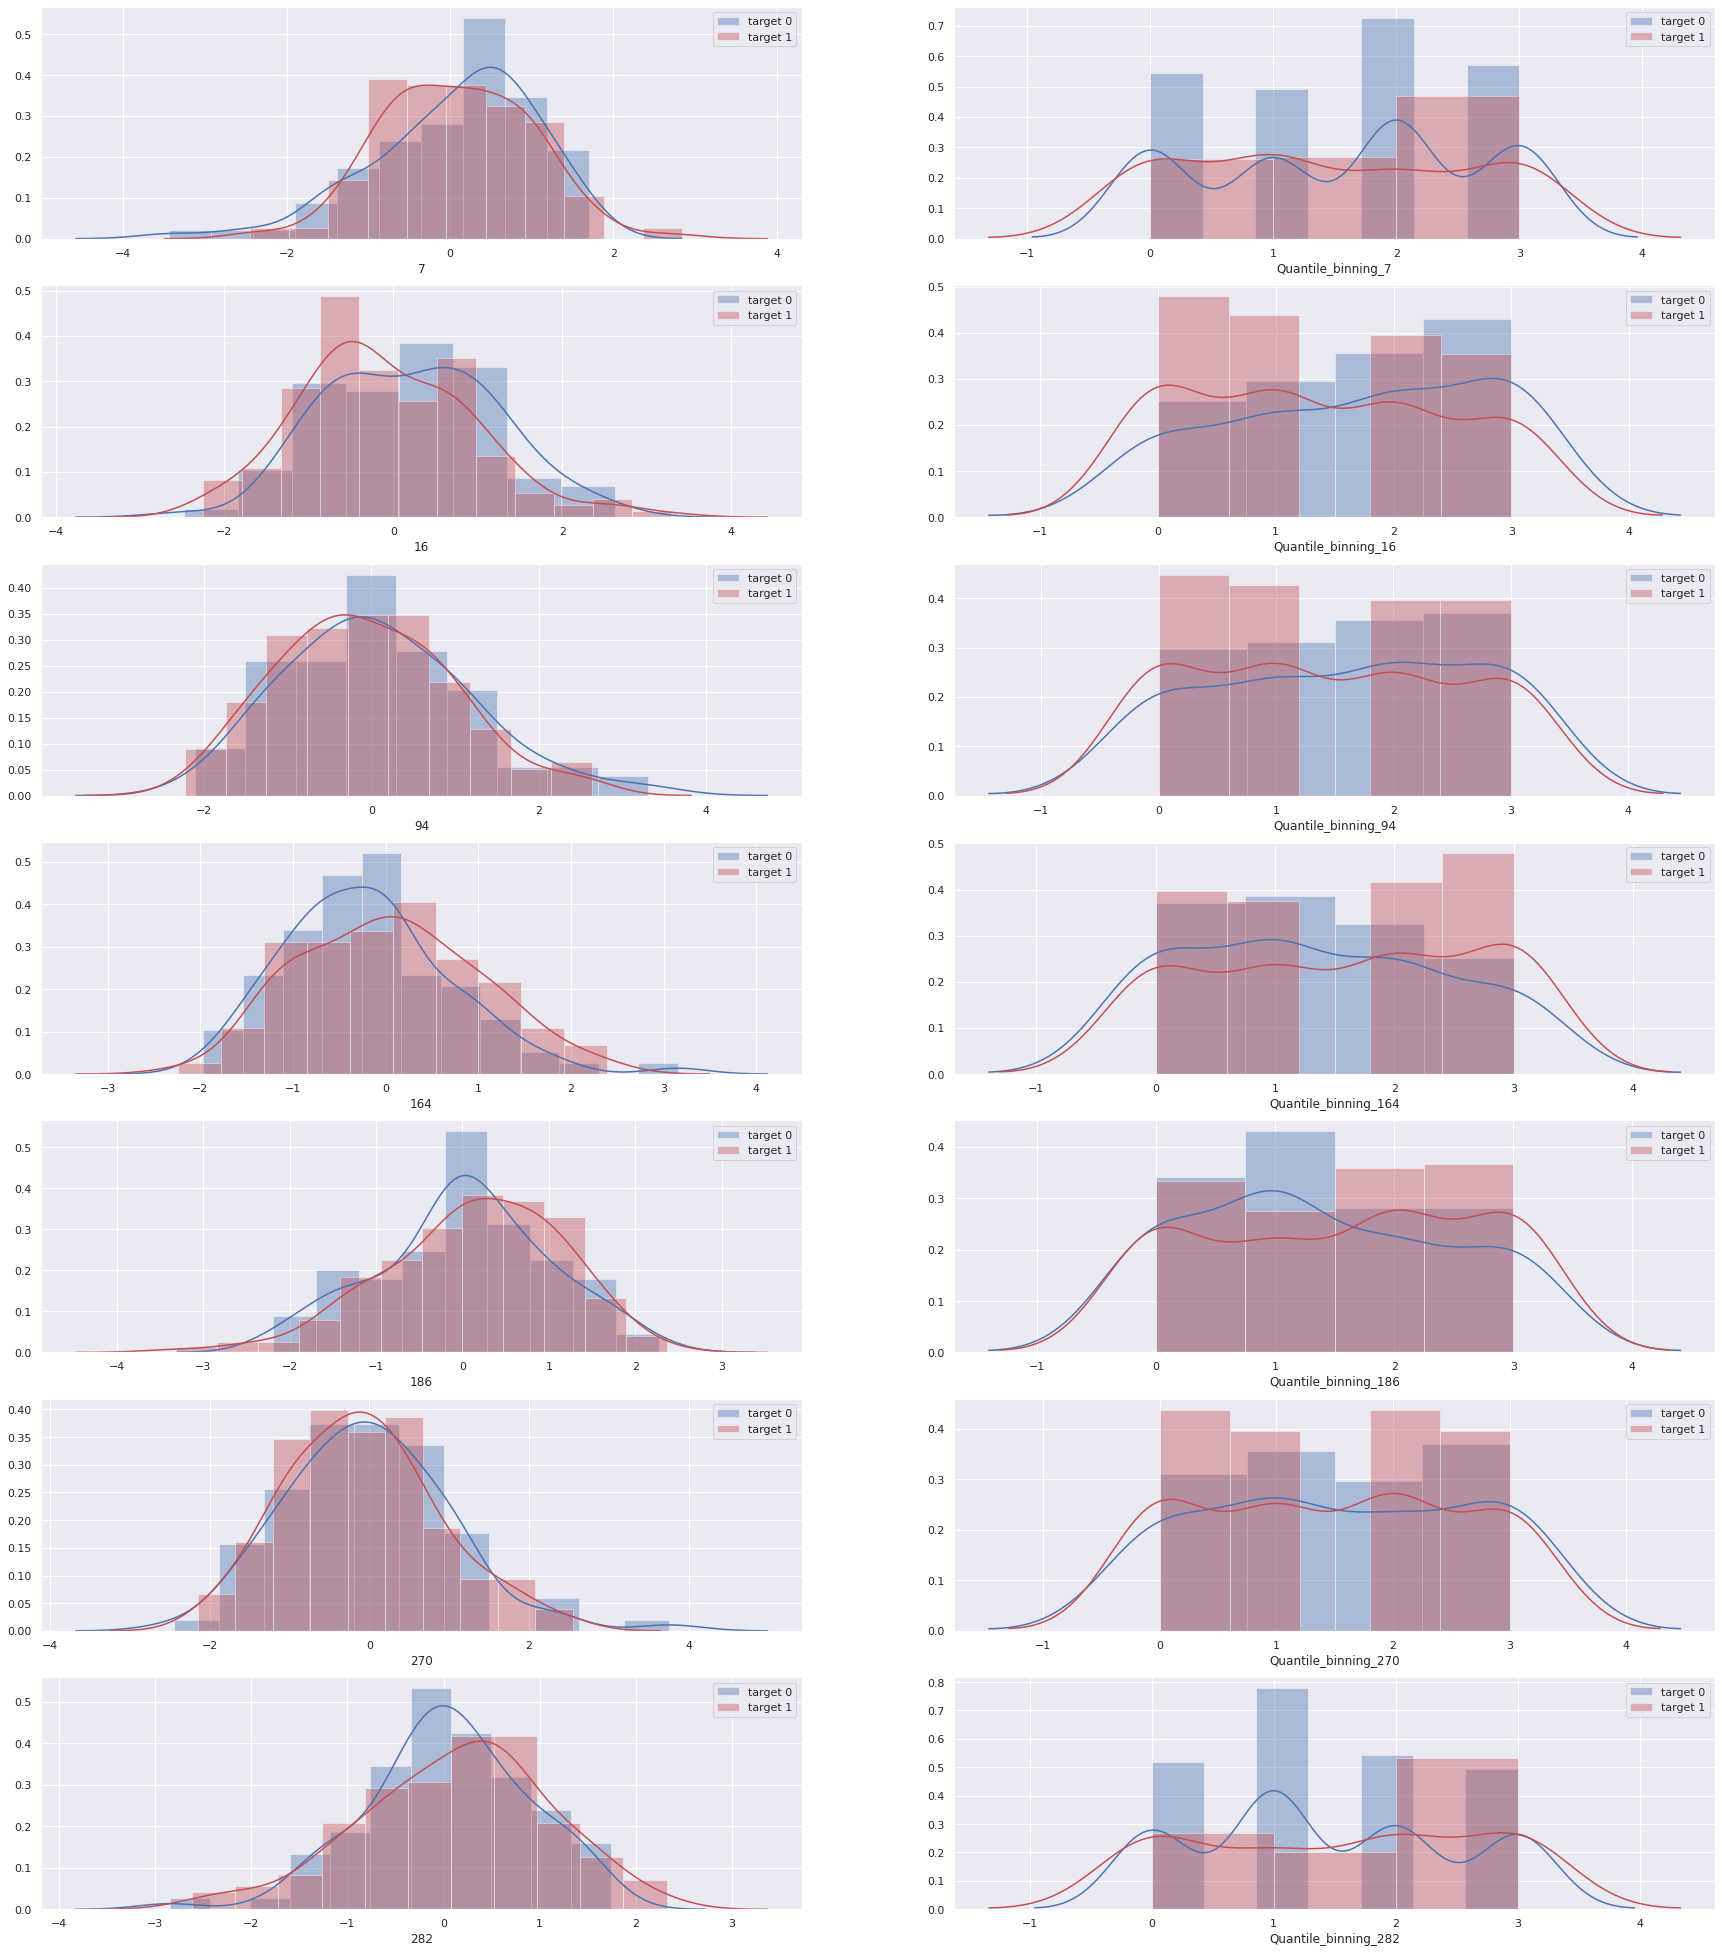

In [ ]:
sns.set(rc={'figure.figsize':(30,35)})

cnt = 1;
for col in bf.keys():
    plt.subplot(len(bf.keys()),2,cnt)
    g0 = data[data['target']==0.0][col]
    g1 = data[data['target']==1.0][col]
    sns.distplot(g0, label = 'target 0', color='b')
    sns.distplot(g1, label = 'target 1', color='r')
    plt.legend()

    plt.subplot(len(bf.keys()),2,cnt+1)
    g0 = data[data['target']==0.0]['Quantile_binning_'+col]
    g1 = data[data['target']==1.0]['Quantile_binning_'+col]
    sns.distplot(g0, label = 'target 0', color='b')
    sns.distplot(g1, label = 'target 1', color='r')
    plt.legend()
    cnt += 2

plt.show()

* Using quartile based adaptive binning we converted 7 skewed features into a categorical features
* engineered features also shows the overlap betwenn target 0 and target 1 points but above certain limit of frequencies target 0 points are dominenet which is the evidence of useful festure

In [ ]:
data.head()

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,Quantile_binning_7,Quantile_binning_16,Quantile_binning_94,Quantile_binning_164,Quantile_binning_186,Quantile_binning_270,Quantile_binning_282
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,-0.912,-0.107,0.305,0.102,0.826,0.417,0.177,-0.673,-0.503,1.864,0.410,-1.927,0.102,-0.931,1.763,1.449,-1.097,-0.686,-0.250,-1.859,1.125,1.009,-2.296,0.385,-0.876,1.528,-0.144,-1.078,...,2.457,0.771,-0.460,0.569,-1.320,-1.516,-2.145,-1.120,0.156,0.820,-1.049,-1.125,0.484,0.617,1.253,1.248,0.504,-0.802,-0.896,-1.793,-0.284,-0.601,0.569,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065,2,2,3,1,3,3,3
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,2.907,1.085,2.144,1.540,0.584,1.133,1.098,-0.237,-0.498,0.283,-1.100,-0.417,1.382,-0.515,-1.519,0.619,-0.128,0.866,-0.540,1.238,-0.227,0.269,-0.390,-2.721,1.659,0.106,-0.121,1.719,...,-0.104,-0.583,1.267,-1.667,-2.771,-0.516,1.312,0.491,0.932,2.064,0.422,1.215,2.012,0.043,-0.307,-0.059,1.121,1.333,0.211,1.753,0.053,1.274,-0.612,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973,2,3,3,0,1,0,1
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,0.137,0.183,0.459,0.478,-0.425,0.352,1.095,0.300,-1.044,0.270,-1.038,0.144,-1.658,-0.946,0.633,-0.772,1.786,0.136,-0.103,-1.223,2.273,0.055,-2.032,-0.452,0.064,0.924,-0.692,-0.067,-0.917,1.896,...,0.432,1.345,-0.491,-1.602,-0.727,0.346,0.780,-0.527,-1.122,-0.208,-0.730,-0.302,2.535,-1.045,0.037,0.020,1.373,0.456,-0.277,1.381,1.843,0.749,0.202,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211,1,0,2,2,0,0,1
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,0.503,0.274,0.335,-1.148,0.067,-1.010,1.048,-1.442,0.210,0.836,-0.326,0.716,-0.764,0.248,-1.308,2.127,0.365,0.296,-0.808,1.854,0.118,0.380,0.999,-1.171,2.798,0.394,-1.048,1.078,0.401,-0.486,...,0.512,-0.424,0.769,0.223,-0.710,2.725,0.176,0.845,-1.226,1.527,-1.701,0.597,0.150,1.864,0.322,-0.214,1.282,0.408,-0.910,1.020,-0.299,-1.574,-1.618,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238,3,2,1,3,1,2,1
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,-0.012,2.198,0.190,0.453,0.494,1.478,-1.412,0.270,-1.312,-0.322,-0.688,-0.198,-0.285,1.042,-0.315,-0.478,0.024,-0.190,1.656,-0.469,-1.437,-0.581,-0.308,-0.837,-1.739,0.037,0.336,-1.102,2.371,0.554,...,0.416,0.174,-1.517,-0.337,0.055,-0.464,0.014,-1.073,0.325,-0.523,-0.692,0.190,-0.883,-1.830,1.408,2.319,1.704,-0.723,1.014,0.064,0.096,-0.775,1.845,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253,3,0,2,2,3,1,3


In [ ]:
test.head()

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,Quantile_binning_7,Quantile_binning_16,Quantile_binning_94,Quantile_binning_164,Quantile_binning_186,Quantile_binning_270,Quantile_binning_282
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,1.291,0.507,-0.317,1.848,-0.232,-0.340,-0.051,0.804,0.764,1.860,0.262,1.112,-0.491,-1.039,-0.492,0.183,-0.671,-1.313,0.149,0.244,1.072,-1.003,0.832,-1.075,1.988,1.201,-2.065,-0.826,-0.016,0.490,...,1.009,0.998,0.210,-1.634,1.046,0.114,-0.806,0.301,0.145,-0.684,0.794,-0.290,-1.688,0.313,1.140,0.447,-0.616,1.294,0.785,0.453,1.550,-0.866,1.007,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979,1,3,2,0,1,0,2
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,1.356,-1.086,0.322,0.876,-0.563,-1.394,0.385,1.891,-2.107,-0.636,-0.055,-0.843,0.041,0.253,0.557,0.475,-0.839,-1.146,1.210,1.427,0.347,1.077,-0.194,0.323,0.543,0.894,1.190,0.342,-0.858,0.756,...,0.133,-2.746,0.341,-1.145,0.492,0.437,-0.628,0.271,2.639,0.481,-0.687,1.017,1.648,-1.272,-0.797,-0.870,-1.582,-1.987,-0.052,-0.194,0.539,-1.788,-0.433,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761,1,3,2,1,0,0,0
2,252,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,0.167,-0.132,0.459,-0.341,0.014,0.184,-0.460,-0.991,-1.039,0.992,1.036,1.552,-0.830,1.374,-0.914,0.427,0.027,0.327,1.117,0.871,-2.556,-0.036,-0.081,0.744,-1.191,-1.784,0.239,0.500,0.437,0.746,...,-1.558,0.620,-0.489,-2.090,-0.977,1.672,-0.655,-0.801,-1.846,0.761,-0.846,0.181,0.962,-0.611,1.450,0.021,0.320,-0.951,-2.662,0.761,-0.665,-0.619,-0.645,-0.094,0.351,-0.607,-0.737,-0.031,0.701,0.976,0.135,-1.327,2.463,0,0,3,1,0,0,2
3,253,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,0.567,0.356,-0.060,0.767,-0.196,0.359,0.080,-0.956,0.857,-0.655,-0.090,-0.008,-0.596,-0.413,-1.030,0.173,-0.969,0.998,0.079,0.790,-0.776,-0.374,-1.995,0.572,0.542,0.547,0.307,-0.074,1.703,-0.003,...,1.866,-0.273,-0.237,-0.207,-0.196,-1.106,-1.560,-0.934,2.167,0.323,0.583,1.480,-0.685,-0.473,-1.066,-0.271,0.506,-0.753,1.048,-0.450,-0.300,-1.221,0.235,-0.336,-0.787,0.255,-0.031,-0.836,0.916,2.411,1.053,-1.601,-1.529,3,0,0,2,1,1,1
4,254,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,-0.930,-0.098,0.896,0.293,-0.259,0.030,-0.661,0.921,0.006,-0.631,1.284,-1.167,-0.744,-2.184,2.146,1.130,0.017,1.421,-0.590,1.938,-0.194,0.794,0.579,0.521,0.635,-0.023,-0.892,-0.363,-0.360,0.405,...,0.578,-0.064,0.738,-0.280,0.745,-0.588,-0.429,-0.588,0.154,-1.187,1.681,-0.832,-0.437,-0.038,-1.096,-0.156,3.565,-0.428,-0.384,1.243,-0.966,1.525,0.458,2.184,-1.090,0.216,1.186,-0.143,0.322,-0.068,-0.156,-1.153,0.825,0,3,1,0,0,1,1


In [ ]:
fe = ['Quantile_binning_'+f for f in bf.keys()]
fe

['Quantile_binning_7',
 'Quantile_binning_16',
 'Quantile_binning_94',
 'Quantile_binning_164',
 'Quantile_binning_186',
 'Quantile_binning_270',
 'Quantile_binning_282']

In [ ]:
data[['id']+fe].to_csv('data/trainEngineeredFeatures.csv', index=False)
test[['id']+fe].to_csv('data/testEngineeredFeatures.csv', index=False)